In [1]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv("./dataset/transfer_data.csv")
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [2]:
# define x and y
X = data.loc[:, "x"]
y = data.loc[:, "y"]

In [3]:
X.head()

0   -5.0
1   -4.9
2   -4.8
3   -4.7
4   -4.6
Name: x, dtype: float64

In [4]:
y.head()

0    25.00
1    24.01
2    23.04
3    22.09
4    21.16
Name: y, dtype: float64

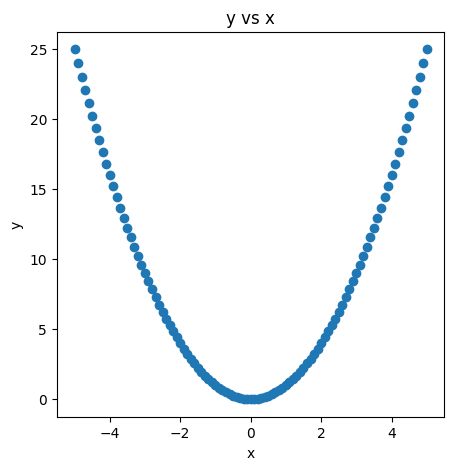

In [5]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# 转换成 N 行一列的数组
X = np.array(X).reshape(-1,1)
# X: 101行，1列, Y: 
print(type(X), X.shape)
print(X[0])
print(X)

<class 'numpy.ndarray'> (101, 1)
[-5.]
[[-5.00e+00]
 [-4.90e+00]
 [-4.80e+00]
 [-4.70e+00]
 [-4.60e+00]
 [-4.50e+00]
 [-4.40e+00]
 [-4.30e+00]
 [-4.20e+00]
 [-4.10e+00]
 [-4.00e+00]
 [-3.90e+00]
 [-3.80e+00]
 [-3.70e+00]
 [-3.60e+00]
 [-3.50e+00]
 [-3.40e+00]
 [-3.30e+00]
 [-3.20e+00]
 [-3.10e+00]
 [-3.00e+00]
 [-2.90e+00]
 [-2.80e+00]
 [-2.70e+00]
 [-2.60e+00]
 [-2.50e+00]
 [-2.40e+00]
 [-2.30e+00]
 [-2.20e+00]
 [-2.10e+00]
 [-2.00e+00]
 [-1.90e+00]
 [-1.80e+00]
 [-1.70e+00]
 [-1.60e+00]
 [-1.50e+00]
 [-1.40e+00]
 [-1.30e+00]
 [-1.20e+00]
 [-1.10e+00]
 [-1.00e+00]
 [-9.00e-01]
 [-8.00e-01]
 [-7.00e-01]
 [-6.00e-01]
 [-5.00e-01]
 [-4.00e-01]
 [-3.00e-01]
 [-2.00e-01]
 [-1.00e-01]
 [-2.04e-14]
 [ 1.00e-01]
 [ 2.00e-01]
 [ 3.00e-01]
 [ 4.00e-01]
 [ 5.00e-01]
 [ 6.00e-01]
 [ 7.00e-01]
 [ 8.00e-01]
 [ 9.00e-01]
 [ 1.00e+00]
 [ 1.10e+00]
 [ 1.20e+00]
 [ 1.30e+00]
 [ 1.40e+00]
 [ 1.50e+00]
 [ 1.60e+00]
 [ 1.70e+00]
 [ 1.80e+00]
 [ 1.90e+00]
 [ 2.00e+00]
 [ 2.10e+00]
 [ 2.20e+00]
 [ 2.30e+00]

In [7]:
print(type(y))
print(y.shape)
print(y)

<class 'pandas.core.series.Series'>
(101,)
0      25.00
1      24.01
2      23.04
3      22.09
4      21.16
       ...  
96     21.16
97     22.09
98     23.04
99     24.01
100    25.00
Name: y, Length: 101, dtype: float64


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 50个神经元，输入是1维
model1.add(Dense(units=50, input_dim=1, activation="relu"))
# 50个神经元，输入从上一层直接连接过来
model1.add(Dense(units=50, activation="relu"))
# 输入层1个单元，线性回归
model1.add(Dense(units=1, activation="linear"))
# 配置
model1.compile(optimizer="adam", loss="mean_squared_error")


c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# train the model
model1.fit(X, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118.7151 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.5008 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.1129
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.7031 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.2425 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.4968  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88.3504 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86.3202 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.9870 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81.6600 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.0390 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 75.8957
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.7380 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.2717 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58.2111

In [11]:
# 对原始数据的预测
y_predict = model1.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


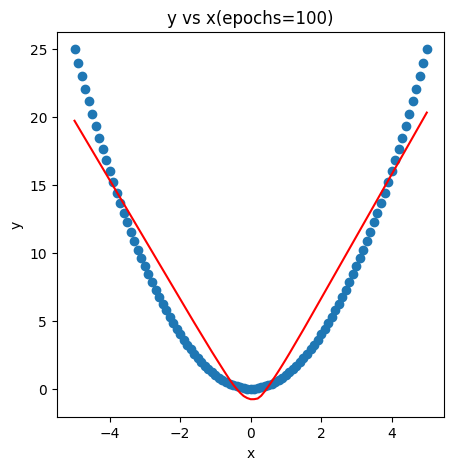

In [12]:
fig2 = plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(X, y_predict, "r")
plt.title("y vs x(epochs=100)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [13]:
# 再迭代 100 次，一共200次
model1.fit(X, y, epochs=100)
y_predict = model1.predict(X)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4194 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5948 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9148 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3540 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0915 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0540 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9006 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9834 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8708 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3635 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0562 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8357 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6839 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1723 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3991 
Epoch 16/100
4/4 ━━

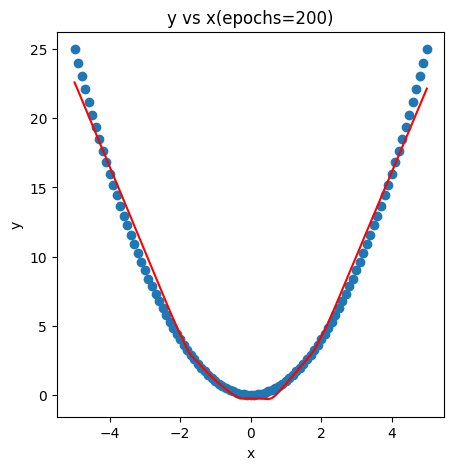

In [14]:
fig3 = plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(X, y_predict, "r")
plt.title("y vs x(epochs=200)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
# 再迭代 200 次，一共400次
model1.fit(X, y, epochs=100)
y_predict = model1.predict(X)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8641 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7166 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7451 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.7050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7174 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7309 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6949 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6395 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6672 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6626 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7335 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5196 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7102 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5835 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5967 
Epoch 16/100
4/4 ━

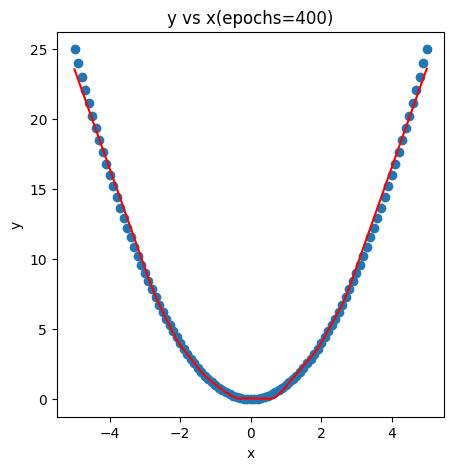

In [16]:
fig4 = plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(X, y_predict, "r")
plt.title("y vs x(epochs=400)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
import joblib

joblib.dump(model1, "model1.m")

['model1.m']

In [18]:
model2 = joblib.load('model1.m')

In [19]:
data2 = pd.read_csv('./dataset/transfer_data2.csv')
data2.head()

,x2,y2
0,-5.0,26.00
1,-4.9,25.21
2,-4.8,24.44
3,-4.7,23.69
4,-4.6,22.96


In [20]:
# define x2 and y2
X2 = data2.loc[:, "x2"]
y2 = data2.loc[:, "y2"]

In [21]:
X2 = np.array(X2).reshape(-1,1)

In [22]:
print(type(X2))
print(X2.shape)
print(X2)

<class 'numpy.ndarray'>
(101, 1)
[[-5.00e+00]
 [-4.90e+00]
 [-4.80e+00]
 [-4.70e+00]
 [-4.60e+00]
 [-4.50e+00]
 [-4.40e+00]
 [-4.30e+00]
 [-4.20e+00]
 [-4.10e+00]
 [-4.00e+00]
 [-3.90e+00]
 [-3.80e+00]
 [-3.70e+00]
 [-3.60e+00]
 [-3.50e+00]
 [-3.40e+00]
 [-3.30e+00]
 [-3.20e+00]
 [-3.10e+00]
 [-3.00e+00]
 [-2.90e+00]
 [-2.80e+00]
 [-2.70e+00]
 [-2.60e+00]
 [-2.50e+00]
 [-2.40e+00]
 [-2.30e+00]
 [-2.20e+00]
 [-2.10e+00]
 [-2.00e+00]
 [-1.90e+00]
 [-1.80e+00]
 [-1.70e+00]
 [-1.60e+00]
 [-1.50e+00]
 [-1.40e+00]
 [-1.30e+00]
 [-1.20e+00]
 [-1.10e+00]
 [-1.00e+00]
 [-9.00e-01]
 [-8.00e-01]
 [-7.00e-01]
 [-6.00e-01]
 [-5.00e-01]
 [-4.00e-01]
 [-3.00e-01]
 [-2.00e-01]
 [-1.00e-01]
 [-2.04e-14]
 [ 1.00e-01]
 [ 2.00e-01]
 [ 3.00e-01]
 [ 4.00e-01]
 [ 5.00e-01]
 [ 6.00e-01]
 [ 7.00e-01]
 [ 8.00e-01]
 [ 9.00e-01]
 [ 1.00e+00]
 [ 1.10e+00]
 [ 1.20e+00]
 [ 1.30e+00]
 [ 1.40e+00]
 [ 1.50e+00]
 [ 1.60e+00]
 [ 1.70e+00]
 [ 1.80e+00]
 [ 1.90e+00]
 [ 2.00e+00]
 [ 2.10e+00]
 [ 2.20e+00]
 [ 2.30e+00]
 [ 2.

In [23]:
y2_predict = model2.predict(X2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


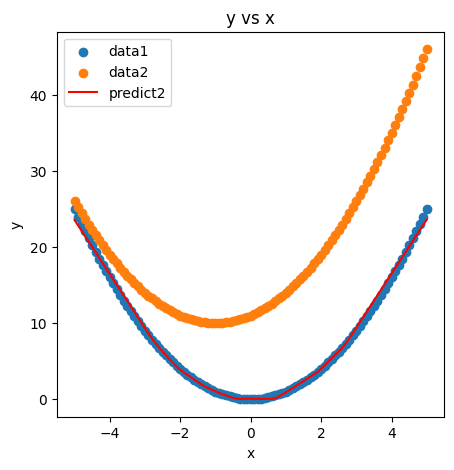

In [24]:
fig5 = plt.figure(figsize=(5, 5))
plt.scatter(X, y, label="data1")
plt.scatter(X2, y2, label="data2")
plt.plot(X2, y2_predict, "r", label="predict2")
plt.title("y vs x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [25]:
# 数据预测的不好，需要重新训练一下
# 只迭代10次，速度快很多
model2.fit(X2,y2,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155.7438  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 111.9591
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3452 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.2004 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.9676 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 26.3193
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8850 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5170 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.9056 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.3542 


In [26]:
y2_predict = model2.predict(X2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


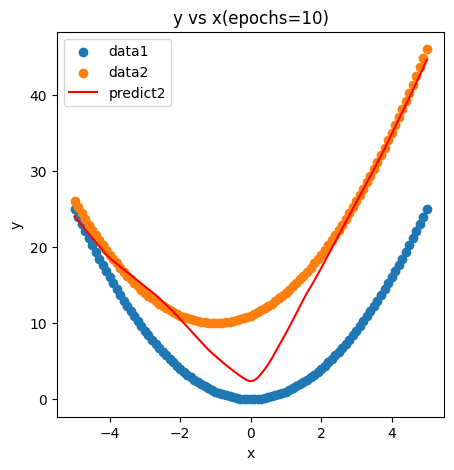

In [27]:
fig6 = plt.figure(figsize=(5, 5))
plt.scatter(X, y, label="data1")
plt.scatter(X2, y2, label="data2")
plt.plot(X2, y2_predict, "r", label="predict2")
plt.title("y vs x(epochs=10)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [28]:
# 再迭代10次，让拟合的效果更好
model2.fit(X2,y2,epochs=10)
y2_predict = model2.predict(X2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2294
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4542 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5592  
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1221 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8888 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8209 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1155 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6320 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1593 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8227 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


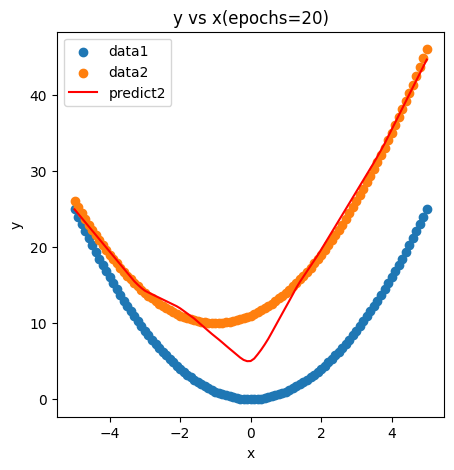

In [29]:
fig7 = plt.figure(figsize=(5, 5))
plt.scatter(X, y, label="data1")
plt.scatter(X2, y2, label="data2")
plt.plot(X2, y2_predict, "r", label="predict2")
plt.title("y vs x(epochs=20)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [30]:
# 再迭代20次，共计40次，让拟合的效果更好
model2.fit(X2,y2,epochs=20)
y2_predict = model2.predict(X2)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2628 
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2453 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5079 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2328 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1685 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5956 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9096 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1232 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 2.4147
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9640 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7773 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5791 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4326 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6595 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4988 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━

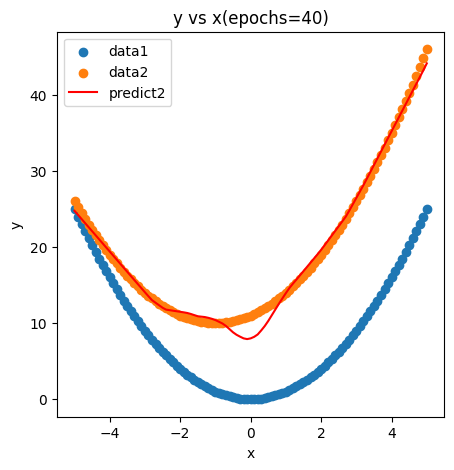

In [31]:
fig8 = plt.figure(figsize=(5, 5))
plt.scatter(X, y, label="data1")
plt.scatter(X2, y2, label="data2")
plt.plot(X2, y2_predict, "r", label="predict2")
plt.title("y vs x(epochs=40)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()